In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.datasets import load_breast_cancer

In [303]:
breast = load_breast_cancer()

In [304]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [305]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [306]:
breast_labels = breast.target

In [307]:
breast_labels.shape

(569,)

In [308]:
labels = np.reshape(breast_labels,(569,1))

In [309]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [310]:
final_breast_data.shape

(569, 31)

In [311]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [312]:
features_labels = np.append(features,'label')

In [313]:
breast_dataset.columns = features_labels

In [314]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [315]:
#breast_dataset['label'].replace(0, 'Benign',inplace=True)
#breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [316]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [317]:
train=breast_dataset.sample(frac=0.8,random_state=0) 
test=breast_dataset.drop(train.index)

In [318]:
train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.144500,0.081720,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.510600,0.20510,0.3585,0.11090,0.0
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.027720,0.020680,0.1619,0.05584,...,34.23,91.29,632.9,0.12890,0.10630,0.139000,0.06005,0.2444,0.06788,1.0
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.020870,0.026520,0.1589,0.05586,...,19.31,96.53,688.9,0.10340,0.10170,0.062600,0.08216,0.2136,0.06710,1.0
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.024750,0.013740,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.21670,0.156500,0.07530,0.2636,0.07676,1.0
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,14.48,21.46,94.25,648.2,0.09444,0.09947,0.120400,0.049380,0.2075,0.05636,...,29.25,108.40,808.9,0.13060,0.19760,0.334900,0.12250,0.3020,0.06846,0.0
266,10.60,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,0.06491,...,22.94,78.28,424.8,0.12130,0.25150,0.191600,0.07926,0.2940,0.07587,1.0
36,14.25,21.72,93.63,633.0,0.09823,0.10980,0.131900,0.055980,0.1885,0.06125,...,30.36,116.20,799.6,0.14460,0.42380,0.518600,0.14470,0.3591,0.10140,0.0
193,12.34,26.86,81.15,477.4,0.10340,0.13530,0.108500,0.045620,0.1943,0.06937,...,39.34,101.70,768.9,0.17850,0.47060,0.442500,0.14590,0.3215,0.12050,0.0


In [319]:
test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.26540,0.4601,0.11890,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750,0.0
23,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278,...,35.59,188.00,2615.0,0.14010,0.26000,0.3155,0.20090,0.2822,0.07526,0.0
28,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,...,36.71,149.30,1269.0,0.16410,0.61100,0.6335,0.20240,0.4027,0.09876,0.0
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,...,35.34,87.22,514.0,0.19090,0.26980,0.4023,0.14240,0.2964,0.09606,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,0.06688,...,24.75,99.17,688.6,0.12640,0.20370,0.1377,0.06845,0.2249,0.08492,1.0
551,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552,...,28.26,77.80,436.6,0.10870,0.17820,0.1564,0.06413,0.3169,0.08032,1.0
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.3662,0.11050,0.2258,0.08004,1.0
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1.0


In [320]:
#Getting the 'X' of Training and Test set
X_train = train.values[:,:30]
X_test = test.values[:,:30]

In [321]:
#Getting the 'Y' of Training and Test set
Y_train = np.array(train.label)
Y_test = np.array(test.label)
Y_train.shape, Y_test.shape

((455,), (114,))

In [322]:
#Scaling and Standardizing 'X' of Train Set
Min_Max_Scaling = MinMaxScaler()
X = Min_Max_Scaling.fit_transform(X_train)

sc = StandardScaler()
X_train_std = sc.fit_transform(X)
X_train_std.shape

(455, 30)

In [323]:
#Standardizing 'X' of Test Set
Min_Max_Scaling = MinMaxScaler()
X = Min_Max_Scaling.fit_transform(X_test)

sc = StandardScaler()
X_test_std = sc.fit_transform(X)
X_test_std.shape

(114, 30)

In [324]:
#Executing Logistic Regression
model = LogisticRegression(solver='liblinear')
model.fit(X_train_std, Y_train)

LogisticRegression(solver='liblinear')

In [325]:
#Prediction after fitting
Y_predicted = model.predict(X_test_std)
print(Y_predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


In [326]:
# #Training Accuracy
# trainAccuracy = model.score(X_train_std, Y_train)
# trainAccuracy

# #Test Accuracy
# testAccuracy = model.score(X_test_std, Y_test)
# testAccuracy

In [327]:
#Accuracy 
metrics.accuracy_score(Y_test,Y_predicted)

0.9912280701754386

In [328]:
#Precision 
metrics.precision_score(Y_test,Y_predicted)

0.9859154929577465

In [329]:
#Recall
metrics.recall_score(Y_test,Y_predicted)

1.0

In [330]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(Y_test,Y_predicted)
cnf_matrix

array([[43,  1],
       [ 0, 70]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

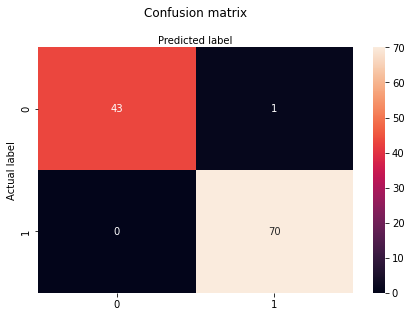

In [331]:
#Plotting Heat Map
import seaborn as sns

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [332]:
#Adding varying weight penalties
C = [1, 0.5,0.1,  0.01,0.001]
for c in C:
    wp_model = LogisticRegression(penalty='l1', C = c, solver='liblinear')
    wp_model.fit(X_train_std, Y_train)
    print("C =", c)
    print("training accuracy: ", wp_model.score(X_train_std, Y_train))
    print("test accuracy: ", wp_model.score(X_test_std, Y_test))
    print(' ')

C = 1
training accuracy:  0.9868131868131869
test accuracy:  0.9736842105263158
 
C = 0.5
training accuracy:  0.9868131868131869
test accuracy:  0.9824561403508771
 
C = 0.1
training accuracy:  0.978021978021978
test accuracy:  0.9736842105263158
 
C = 0.01
training accuracy:  0.9406593406593406
test accuracy:  0.9473684210526315
 
C = 0.001
training accuracy:  0.36923076923076925
test accuracy:  0.38596491228070173
 
